## Buscador y graficador de constrastes. 

### Indicadores disponibles en el Banco mundial sobre Hong Kong y Japón. 

### Datos brutos: Hong Kong

In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ba60338a961746fc94eb774d0b3fe9fa = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='2YdvIP3AFV9ghzaJRmHuiEPRd3IZLUY7ZwzIuJXrSC3k',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_ba60338a961746fc94eb774d0b3fe9fa.get_object(Bucket='hkgvsjpnbgbm-donotdelete-pr-kytnej1n1ckwr8',Key='Data HKG.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

HKG = pd.read_excel(body, skiprows = 3)



### Datos brutos: Japón

In [2]:

body = client_ba60338a961746fc94eb774d0b3fe9fa.get_object(Bucket='hkgvsjpnbgbm-donotdelete-pr-kytnej1n1ckwr8',Key='JPN_Data.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

JPN = pd.read_excel(body, skiprows = 3)

### Librerías

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook

### Marcos de datos usables

In [4]:
HKG.columns = HKG.iloc[0]
HKG.drop('Country Name', axis = 1 , inplace = True)
HKG.drop('Country Code', axis = 1, inplace = True)
HKG.sort_values('Indicator Name', ascending = True,inplace = True)
HKG.reset_index(inplace = True)
HKG.drop('index',axis = 1, inplace = True)

#--------------------------------------------------------

HT1 = HKG.transpose()
HT1.columns = HT1.iloc[0]
HT1.drop('Indicator Name', axis = 0, inplace = True)
HT1.drop('Indicator Code', axis = 0, inplace = True)

JPN.columns = JPN.iloc[0]
JPN.drop('Country Name', axis = 1 , inplace = True)
JPN.drop('Country Code', axis = 1, inplace = True)
JPN.sort_values('Indicator Name', ascending = True,inplace = True)
JPN.reset_index(inplace = True)
JPN.drop('index',axis = 1, inplace = True)

#--------------------------------------------------------

JT1 = JPN.transpose()
JT1.columns = JT1.iloc[0]
JT1.drop('Indicator Name', axis = 0, inplace = True)
JT1.drop('Indicator Code', axis = 0, inplace = True)
JT1.drop(2020, axis = 0, inplace = True) #Elmimando 2020 que son valores NaN
JPN.drop(2020, axis = 1 , inplace = True) #Eliminando 2020 que son valores NaN

print('Longitud de HKG:', len(HKG)) #Indicadores de HKG
print('Longitud de HT1:', len(HT1)) #Años medidos HKG
print('Longitud de JPN:', len(JPN)) #Inidcadores de JPN
print('Longitud de JT1:', len(JT1)) #Años medidos de JPN -- La medición llega hasta 2020 con 
#-- valores NaN, borrarlo o dejarlo es indiferente. Pero por cuestiones profesionales, borraremos
# --- 2020. 



Longitud de HKG: 1438
Longitud de HT1: 60
Longitud de JPN: 1438
Longitud de JT1: 60


### Función buscador

In [5]:
def Buscador (word):
    list1 = []
    for i in range(len(HKG)): 
        if HKG['Indicator Name'][i].find(word) >= 0:
            list1.append(HKG['Indicator Name'][i])
    return (list1)

### Función graficadora de contrastes sin datos descriptivos

In [6]:
def Grafica (i):
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    %matplotlib notebook
    # i es la variable que contiene a la cadena. La variable i tiene que ser escrita con ''
    #print('Variables descriptivas con valores Nulos:', HT1[[i]].describe())
    #print('Desviación estándar {}:'.format(np.std(HT1[[i]][i].values)))
    #print('Máximo {}:'.format(HT1[[i]][i].values.max()))
    #print('Mínimo {}:'.format( HT1[[i]][i].values.min()))
    print('------------------------------------------------')
    print('Información del Dataset HKG')
    print(HT1[[i]].info())
    print('Información del Dataset JPN')
    print(JT1[[i]].info())
    print('------------------------------------------------')
    
    a = HT1[[i]].notnull().sum()
    b = len(HT1[[i]])
    print('Porcentaje de datos no nulos (Hong Kong) (%):')
    print((a/b)*100)
    
    #-------------------------------------
    
    c = JT1[[i]].notnull().sum()
    d = len(JT1[[i]])
    print('Porcentaje de datos no nulos (Japón) (%):')
    print((c/d)*100)

    print('------------------------------------------------')
    New = HT1[[i]]
    New.dropna(inplace = True)
    NewJ = JT1[[i]]
    NewJ.dropna(inplace = True)
    #print('Variables descriptivas con datos no Nulos')
    #print(' ')
    #print('Desviación estándar con valores no Nulos (Hong Kong):', np.std(New[i].values))
    #print('Desviación estándar con valores no Nulos (Japón):', np.std(NewJ[i].values))
    #print(' ')
    #print('Máximo de la serie (Hong Kong):', New[i].values.max())
    #print('Máximo de la serie (Japón): ', NewJ[i].values.max())
    #print(' ')
    #print('Mínimo de la serie (Hong Kong):', New[i].values.min())
    #print('Mínimo de la serie (Japón):', NewJ[i].values.min())
    #print(' ')
    #print('Media de la serie (Hong Kong):', New[i].values.mean())
    #print('Media de la serie (Japón):', NewJ[i].values.mean())
    #print('------------------------------------------------')
    #print('Descripción del Dataset (Hong Kong)')
    #print(New.describe())
    #print(' ')
    #print('Descripción del Dataset (Japón)')
    #print(NewJ.describe())

    print('------------------------------------------------')
    #--------------------------------------------------------------------------
    A = HT1[[i]]
    A.fillna(0, inplace = True)
    A.reset_index(inplace = True)
    NaN = []
    XNaN = []
    for j in range(len(A)):
        if A[i][j] == 0:
            NaN.append(A[i][j])
            XNaN.append(A[0][j])
    
    
    B = JT1[[i]]
    B.fillna(0, inplace = True)
    B.reset_index(inplace = True)
    BNaN = []
    BXNaN = []
    for j in range(len(B)):
        if B[i][j] == 0:
            BNaN.append(B[i][j])
            BXNaN.append(A[0][j])
    #----------------------------------------------------------------
    print('Gráfica del Indicador con valores nulos')
    
    New.reset_index(inplace = True)
    X = list(New[0])
    Y = list(New[i])
    NewJ.reset_index(inplace = True)
    XB = list(NewJ[0])
    YB = list(NewJ[i])
    
    #-----------------------------------------------------------
    plt.figure(figsize = (10,5))
    plt.plot(X,Y,'-o', color = 'blue')
    plt.gca().plot(XNaN,NaN,'>', color = 'orange')
    plt.gca().plot(XB,YB,'-o', color = 'red')
    plt.gca().plot(BXNaN,BNaN,'<', color = 'green')
    
    plt.xlabel('Años')
    plt.ylabel(i)
    plt.title('{} en el tiempo'.format(i))
    plt.legend(['Valores no nulos (Hong Kong)','Valores nulos (Hong Kong)','Valores no nulos (Japón)','Valores nulos (Japón)'])
    return (plt.show())

### Función graficadora de contrastes con datos descriptivos

In [7]:
def GraficaDes (i):
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    %matplotlib notebook
    # i es la variable que contiene a la cadena. La variable i tiene que ser escrita con ''
    #print('Variables descriptivas con valores Nulos:', HT1[[i]].describe())
    #print('Desviación estándar {}:'.format(np.std(HT1[[i]][i].values)))
    #print('Máximo {}:'.format(HT1[[i]][i].values.max()))
    #print('Mínimo {}:'.format( HT1[[i]][i].values.min()))
    print('------------------------------------------------')
    print('Información del Dataset HKG')
    print(HT1[[i]].info())
    print('Información del Dataset JPN')
    print(JT1[[i]].info())
    print('------------------------------------------------')
    
    a = HT1[[i]].notnull().sum()
    b = len(HT1[[i]])
    print('Porcentaje de datos no nulos (Hong Kong) (%):')
    print((a/b)*100)
    
    #-------------------------------------
    
    c = JT1[[i]].notnull().sum()
    d = len(JT1[[i]])
    print('Porcentaje de datos no nulos (Japón) (%):')
    print((c/d)*100)

    print('------------------------------------------------')
    New = HT1[[i]]
    New.dropna(inplace = True)
    NewJ = JT1[[i]]
    NewJ.dropna(inplace = True)
    print('Variables descriptivas con datos no Nulos')
    print(' ')
    print('Desviación estándar con valores no Nulos (Hong Kong):', np.std(New[i].values))
    print('Desviación estándar con valores no Nulos (Japón):', np.std(NewJ[i].values))
    print(' ')
    print('Máximo de la serie (Hong Kong):', New[i].values.max())
    print('Máximo de la serie (Japón): ', NewJ[i].values.max())
    print(' ')
    print('Mínimo de la serie (Hong Kong):', New[i].values.min())
    print('Mínimo de la serie (Japón):', NewJ[i].values.min())
    print(' ')
    print('Media de la serie (Hong Kong):', New[i].values.mean())
    print('Media de la serie (Japón):', NewJ[i].values.mean())
    print('------------------------------------------------')
    print('Descripción del Dataset (Hong Kong)')
    print(New.describe())
    print(' ')
    print('Descripción del Dataset (Japón)')
    print(NewJ.describe())

    print('------------------------------------------------')
    #--------------------------------------------------------------------------
    A = HT1[[i]]
    A.fillna(0, inplace = True)
    A.reset_index(inplace = True)
    NaN = []
    XNaN = []
    for j in range(len(A)):
        if A[i][j] == 0:
            NaN.append(A[i][j])
            XNaN.append(A[0][j])
    
    
    B = JT1[[i]]
    B.fillna(0, inplace = True)
    B.reset_index(inplace = True)
    BNaN = []
    BXNaN = []
    for j in range(len(B)):
        if B[i][j] == 0:
            BNaN.append(B[i][j])
            BXNaN.append(A[0][j])
    #----------------------------------------------------------------
    print('Gráfica del Indicador con valores nulos')
    
    New.reset_index(inplace = True)
    X = list(New[0])
    Y = list(New[i])
    NewJ.reset_index(inplace = True)
    XB = list(NewJ[0])
    YB = list(NewJ[i])
    
    #-----------------------------------------------------------
    plt.figure(figsize = (10,5))
    plt.plot(X,Y,'-o', color = 'blue')
    plt.gca().plot(XNaN,NaN,'>', color = 'orange')
    plt.gca().plot(XB,YB,'-o', color = 'red')
    plt.gca().plot(BXNaN,BNaN,'<', color = 'green')
    
    plt.xlabel('Años')
    plt.ylabel(i)
    plt.title('{} en el tiempo'.format(i))
    plt.legend(['Valores no nulos (Hong Kong)','Valores nulos (Hong Kong)','Valores no nulos (Japón)','Valores nulos (Japón)'])
    return (plt.show())

### Gráfica del total de indicadores medidos por año en Hong Kong

El máximo de indicadores registrados es 790
El mínimo de indicadores registrados es 175


<IPython.core.display.Javascript object>


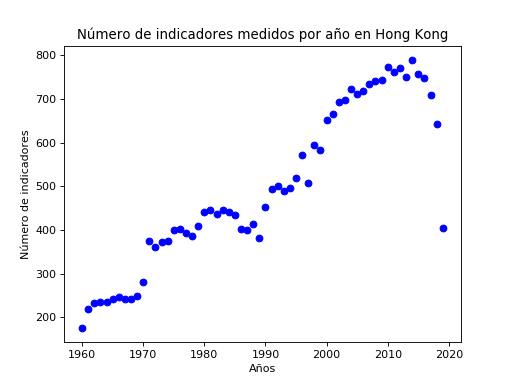

Text(0.5, 1.0, 'Número de indicadores medidos por año en Hong Kong')

In [22]:
HT = HKG.transpose()
HT.drop('Indicator Code', axis = 0, inplace = True)
HT.drop('Indicator Name', axis = 0, inplace = True)
N = []
for i in range(len(HT)):
    N.append(HT.iloc[i].notnull().sum())
print('El máximo de indicadores registrados es', max(N))
print('El mínimo de indicadores registrados es', min(N))
M = HT.index.to_list()
%matplotlib notebook
plt.figure()
plt.scatter(M,N, color = 'blue')
plt.xlabel('Años')
# add a label to the y axis
plt.ylabel('Número de indicadores')
# add a title
plt.title('Número de indicadores medidos por año en Hong Kong')

### Gráfica del total de indicadores medidos por año en Japón

<IPython.core.display.Javascript object>


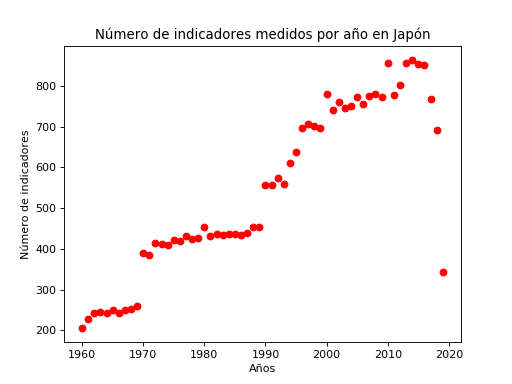

Text(0.5, 1.0, 'Número de indicadores medidos por año en Japón')

In [23]:
JT = JPN.transpose()
JT.drop('Indicator Code', axis = 0, inplace = True)
JT.drop('Indicator Name', axis = 0, inplace = True)
N1 = []
for i in range(len(HT)):
    N1.append(JT.iloc[i].notnull().sum())
M1 = JT.index.to_list()
%matplotlib notebook
plt.figure()
plt.scatter(M1,N1, color = 'red')
plt.xlabel('Años')
# add a label to the y axis
plt.ylabel('Número de indicadores')
# add a title
plt.title('Número de indicadores medidos por año en Japón')

### Indicadores más relevantes respecto al diagnóstico a realizar (Primera búsqueda)

In [10]:
# Indicadores más relevantes relacionados con inversión

#'Empresas que utilizan bancos para financiar la inversión (% de empresas)'
#'Inversión en energía con participación privada (US$ a precios actuales)'
#'Inversión en transporte con participación privada (US$ a precios actuales)'
#'Inversión extranjera directa, entrada neta de capital (% del PIB)'
#'Inversión extranjera directa, entrada neta de capital (balanza de pagos, US$ a precios actuales)'
#'Inversión extranjera directa, neta (balanza de pagos, US$ a precios actuales)'
#'Inversión extranjera directa, salida neta de capital (% del PIB)'
#'Inversión extranjera directa, salidas netas (BDP, USD a precios actuales)'
#'Inversión neta en activos no financieros (% del PIB)'
#'Inversión neta en activos no financieros (UMN actual)'

#Indicadores más relevantes relacionados con Balanza comercial

#'Balanza comercial de bienes y servicios (% del PIB)'
#'Balanza comercial de bienes y servicios (UMN a precios actuales)'
#'Balanza comercial de bienes y servicios (UMN a precios constantes)'
#'Balanza comercial de bienes y servicios (US$ a precios actuales)'

#Indicadores más relevantes relacioandos al PIB

#'Ahorro bruto (% del PIB)'
#'Ahorro interno bruto (% del PIB)'
#'Balanza comercial de bienes y servicios (% del PIB)'
#'Crecimiento del PIB (% anual)'
#'Exportaciones de bienes y servicios (% del PIB)'
#'Formación bruta de capital (% del PIB)'
#'Formación bruta de capital fijo (% del PIB)'
#'Formación bruta de capital fijo, sector privado (% del PIB)'
#'Importaciones de bienes y servicios (% del PIB)'
#'Inflación, deflactor del PIB: series vinculadas (% anual)'
#'Inflación, índice de deflación del PIB (% anual)'
#'Inversión extranjera directa, entrada neta de capital (% del PIB)'
#'Inversión extranjera directa, salida neta de capital (% del PIB)'
#'Inversión neta en activos no financieros (% del PIB)'
#'Masa monetaria (% del PIB)'
#'PIB (US$ a precios actuales)'
#'PIB (US$ a precios constantes de 2010)'
#'PIB per cápita (US$ a precios actuales)',
#'PIB per cápita (US$ a precios constantes de 2010)'
#'PIB por cada persona empleada (a $ de PPA constantes de 2011)'
#'Productividad del agua, total (PIB en US$ constantes del año 2010 por metro cúbico de extracción total de agua dulce)'
#'PIB por unidad de uso de energía, (PPA a $ constantes de 2011 por kg de equivalente de petróleo)'
#'Remesas de trabajadores y compensación de empleados, recibidas (% del PIB)'
#'Renta del gas natural (% del PIB)'
#'Rentas del carbón (% del PIB)'
#'Rentas del petróleo (% del PIB)'
#'Rentas forestales (% del PIB)'
#'Rentas mineras  (% del PIB)'
#'Rentas totales de los recursos naturales (% del PIB)'
#'Saldo en cuenta corriente (% del PIB)'

#Indicadores más relevates relacionados al Desempleo

#'Desempleo, total (% de la población activa total) (estimación modelado OIT)'
#'Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)'
#'Personas desempleadas con educación avanzada (% del desempleo total)'
#'Personas desempleadas con educación básica (% del desempleo total)'
#'Personas desempleadas con educación intermedia (% del desempleo total)'

#Indicadores más relevantes relacionandos con la Inflación

#'Inflación, deflactor del PIB: series vinculadas (% anual)',
#'Inflación, precios al consumidor (% anual)'
#'Inflación, índice de deflación del PIB (% anual)'

#Indicadores más relevantes relacionados con la Política Fiscal

#'Calificación de la política fiscal de la CPIA (1=bajo a 6=alto)'
#'Promedio grupal de políticas estructurales de la CPIA (1=bajo a 6=alto)'

#Indicadores más relevantes relacionados con política Monetaria

#'Crecimiento de la masa monetaria (% anual)',
#'Créditos a otros sectores de la economía nacional (crecimiento anual como % de la masa monetaria)'
#'Créditos al gobierno central (crecimiento anual como % de la masa monetaria)'
#'Créditos al sector privado (crecimiento anual como % de la masa monetaria)'
#'Masa monetaria (% del PIB)'
#'Masa monetaria (moneda local actual)'
#'Relación entre masa monetaria y reservas totales'
#'Tasa de cambio oficial (UMN por US$, promedio para un período)'
#'Índice de tasa de cambio real efectiva (2010 = 100)'
#'Índice de términos netos de intercambio (2000 = 100)'
#'Diferencial de tasas de interés (tasa activa menos tasa pasiva, %)'
#'Tasa de interés activa (%)'
#'Tasa de interés de los depósitos (%)'
#'Tasa de interés real (%)'

### Marco de Datos de indicadores relevantes

In [11]:
MR = HT1[['Empresas que utilizan bancos para financiar la inversión (% de empresas)',
'Inversión en energía con participación privada (US$ a precios actuales)',
'Inversión en transporte con participación privada (US$ a precios actuales)',
'Inversión extranjera directa, entrada neta de capital (% del PIB)',
'Inversión extranjera directa, entrada neta de capital (balanza de pagos, US$ a precios actuales)',
'Inversión extranjera directa, neta (balanza de pagos, US$ a precios actuales)',
'Inversión extranjera directa, salida neta de capital (% del PIB)',
'Inversión extranjera directa, salidas netas (BDP, USD a precios actuales)',
'Inversión neta en activos no financieros (% del PIB)',
'Inversión neta en activos no financieros (UMN actual)',
'Balanza comercial de bienes y servicios (% del PIB)',
'Balanza comercial de bienes y servicios (UMN a precios actuales)',
'Balanza comercial de bienes y servicios (UMN a precios constantes)',
'Balanza comercial de bienes y servicios (US$ a precios actuales)',
'Ahorro bruto (% del PIB)',
'Ahorro interno bruto (% del PIB)',
'Balanza comercial de bienes y servicios (% del PIB)',
'Crecimiento del PIB (% anual)',
'Exportaciones de bienes y servicios (% del PIB)',
'Formación bruta de capital (% del PIB)',
'Formación bruta de capital fijo (% del PIB)',
'Formación bruta de capital fijo, sector privado (% del PIB)',
'Importaciones de bienes y servicios (% del PIB)',
'Inflación, deflactor del PIB: series vinculadas (% anual)',
'Inflación, índice de deflación del PIB (% anual)',
'Inversión extranjera directa, entrada neta de capital (% del PIB)',
'Inversión extranjera directa, salida neta de capital (% del PIB)',
'Inversión neta en activos no financieros (% del PIB)',
'Masa monetaria (% del PIB)',
'PIB (US$ a precios actuales)',
'PIB (US$ a precios constantes de 2010)',
'PIB per cápita (US$ a precios actuales)',
'PIB per cápita (US$ a precios constantes de 2010)',
'PIB por cada persona empleada (a $ de PPA constantes de 2011)',
'Productividad del agua, total (PIB en US$ constantes del año 2010 por metro cúbico de extracción total de agua dulce)',
'PIB por unidad de uso de energía, (PPA a $ constantes de 2011 por kg de equivalente de petróleo)',
'Remesas de trabajadores y compensación de empleados, recibidas (% del PIB)',
'Renta del gas natural (% del PIB)',
'Rentas del carbón (% del PIB)',
'Rentas del petróleo (% del PIB)',
'Rentas forestales (% del PIB)',
'Rentas mineras  (% del PIB)',
'Rentas totales de los recursos naturales (% del PIB)',
'Saldo en cuenta corriente (% del PIB)',
'Desempleo, total (% de la población activa total) (estimación modelado OIT)',
'Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)',
'Personas desempleadas con educación avanzada (% del desempleo total)',
'Personas desempleadas con educación básica (% del desempleo total)',
'Personas desempleadas con educación intermedia (% del desempleo total)',
'Inflación, deflactor del PIB: series vinculadas (% anual)',
'Inflación, precios al consumidor (% anual)',
'Inflación, índice de deflación del PIB (% anual)',
'Calificación de la política fiscal de la CPIA (1=bajo a 6=alto)',
'Promedio grupal de políticas estructurales de la CPIA (1=bajo a 6=alto)',
'Crecimiento de la masa monetaria (% anual)',
'Créditos a otros sectores de la economía nacional (crecimiento anual como % de la masa monetaria)',
'Créditos al gobierno central (crecimiento anual como % de la masa monetaria)',
'Créditos al sector privado (crecimiento anual como % de la masa monetaria)',
'Masa monetaria (% del PIB)',
'Masa monetaria (moneda local actual)',
'Relación entre masa monetaria y reservas totales',
'Tasa de cambio oficial (UMN por US$, promedio para un período)',
'Índice de tasa de cambio real efectiva (2010 = 100)',
'Índice de términos netos de intercambio (2000 = 100)',
'Diferencial de tasas de interés (tasa activa menos tasa pasiva, %)',
'Tasa de interés activa (%)',
'Tasa de interés de los depósitos (%)',
'Tasa de interés real (%)'

     
   ]]

In [12]:
MR1 = MR.transpose()
MR1.reset_index(inplace = True)
MR1.drop_duplicates(subset = ['Indicator Name'], inplace = True)
MR1.set_index('Indicator Name', inplace = True)
MR = MR1.transpose()



In [13]:
Describe = MR.describe().transpose()
Describe.reset_index(inplace = True)
nan = []
for i in range(len(Describe)):
    if Describe['count'][i] == 0:
        nan.append(Describe['Indicator Name'][i])
len(nan)

9

In [14]:
nan

['Empresas que utilizan bancos para financiar la inversión (% de empresas)',
 'Inversión en energía con participación privada (US$ a precios actuales)',
 'Inversión en transporte con participación privada (US$ a precios actuales)',
 'Inversión neta en activos no financieros (% del PIB)',
 'Inversión neta en activos no financieros (UMN actual)',
 'PIB por cada persona empleada (a $ de PPA constantes de 2011)',
 'Productividad del agua, total (PIB en US$ constantes del año 2010 por metro cúbico de extracción total de agua dulce)',
 'Calificación de la política fiscal de la CPIA (1=bajo a 6=alto)',
 'Promedio grupal de políticas estructurales de la CPIA (1=bajo a 6=alto)']

In [15]:
MR.drop('Empresas que utilizan bancos para financiar la inversión (% de empresas)',axis = 1, inplace = True)
MR.drop('Inversión en energía con participación privada (US$ a precios actuales)',axis = 1, inplace = True)
MR.drop('Inversión en transporte con participación privada (US$ a precios actuales)',axis = 1, inplace = True)
MR.drop('Inversión neta en activos no financieros (% del PIB)',axis = 1, inplace = True)
MR.drop('Inversión neta en activos no financieros (UMN actual)',axis = 1, inplace = True)
MR.drop('PIB por cada persona empleada (a $ de PPA constantes de 2011)',axis = 1, inplace = True)
MR.drop('Productividad del agua, total (PIB en US$ constantes del año 2010 por metro cúbico de extracción total de agua dulce)',axis = 1, inplace = True)
MR.drop('Calificación de la política fiscal de la CPIA (1=bajo a 6=alto)',axis = 1, inplace = True)
MR.drop('Promedio grupal de políticas estructurales de la CPIA (1=bajo a 6=alto)',axis = 1, inplace = True)

### Marco de Datos de indicadores relevantes (Con al menos un valor no nulo)

In [16]:
MR.columns #Indicadores usables

Index(['Inversión extranjera directa, entrada neta de capital (% del PIB)',
       'Inversión extranjera directa, entrada neta de capital (balanza de pagos, US$ a precios actuales)',
       'Inversión extranjera directa, neta (balanza de pagos, US$ a precios actuales)',
       'Inversión extranjera directa, salida neta de capital (% del PIB)',
       'Inversión extranjera directa, salidas netas (BDP, USD a precios actuales)',
       'Balanza comercial de bienes y servicios (% del PIB)',
       'Balanza comercial de bienes y servicios (UMN a precios actuales)',
       'Balanza comercial de bienes y servicios (UMN a precios constantes)',
       'Balanza comercial de bienes y servicios (US$ a precios actuales)',
       'Ahorro bruto (% del PIB)', 'Ahorro interno bruto (% del PIB)',
       'Crecimiento del PIB (% anual)',
       'Exportaciones de bienes y servicios (% del PIB)',
       'Formación bruta de capital (% del PIB)',
       'Formación bruta de capital fijo (% del PIB)',
       'F

In [17]:
len(MR.columns)

52

### Balanza de pagos

EconomipediaLectura: 2 min

La balanza de pagos es un documento contable en el que se registran operaciones comerciales, de servicios y de movimientos de capitales de un país con el exterior.

La balanza de pagos es un indicador macroeconómico que proporciona información sobre la situación económica del país de una manera general. Es decir, permite conocer todos los ingresos que recibe un país procedentes del resto del mundo y los pagos que realiza tal país al resto del mundo debido a las importaciones y exportaciones de bienes, servicios, capital o transferencias en un período de tiempo.


### Estructura de la balanza de pagos
Dentro de la balanza de pagos existen cuatro cuentas principales:


#### Balanza por cuenta corriente: 
Esta balanza es la más importante ya es las que más se utiliza para conocer el estado de la economía de un país. Aquí se incluyen las importaciones y exportaciones de bienes y servicios, además de las rentas y transferencias. A su vez, se subdivide en cuatro sub-cuentas: balanza comercial, balanza de servicios, balanza de rentas y balanza de transferencias.

#### Balanza de cuenta de capital: 
Se registran el movimiento de capitales, por ejemplo las ayudas que llegan del extranjero o la compra y venta de bienes que no son financieros.

#### Balanza de cuenta financiera:
Se recogen los préstamos que pide un país al extranjero, las inversiones o depósitos que los países extranjeros efectúan a un país.

#### Cuenta de errores y omisiones:
Esta cuenta se incluye dada la dificultad de calcular con extrema precisión el total de exportaciones e importaciones de un país.
Déficit y superávit en la balanza de pagos
Cada una de estas balanzas dan un saldo independiente que puede ser positivo o negativo:

#### Superávit:
En el caso de que el saldo de un tipo de balanza sea positivo estaremos hablando de que la balanza está en superávit.

#### Déficit: 

En el caso de que sea el saldo sea negativo.
Sin embargo, no se busca el equilibro de cada una de estas balanzas por sí solas, sino el equilibrio global de la balanza de pagos. Por consiguiente, la balanza de pagos siempre estará en equilibro, por ejemplo un déficit en la balanza por cuenta corriente será compensado con un superávit en la balanza por cuenta de capital. Ya que si un país tiene más compras que de ventas, el dinero lo debe obtener por algún lado, bien por medio de inversiones o préstamos extranjeros.



In [18]:
Buscador('cuenta corriente')

['Saldo en cuenta corriente (% del PIB)',
 'Saldo en cuenta corriente (balanza de pagos, US$ a precios actuales)']

------------------------------------------------
Información del Dataset HKG
<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 1960.0 to 2019.0
Data columns (total 1 columns):
Saldo en cuenta corriente (balanza de pagos, US$ a precios actuales)    22 non-null object
dtypes: object(1)
memory usage: 3.4+ KB
None
Información del Dataset JPN
<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 1960.0 to 2019.0
Data columns (total 1 columns):
Saldo en cuenta corriente (balanza de pagos, US$ a precios actuales)    24 non-null object
dtypes: object(1)
memory usage: 960.0+ bytes
None
------------------------------------------------
Porcentaje de datos no nulos (Hong Kong) (%):
Indicator Name
Saldo en cuenta corriente (balanza de pagos, US$ a precios actuales)    36.666667
dtype: float64
Porcentaje de datos no nulos (Japón) (%):
Indicator Name
Saldo en cuenta corriente (balanza de pagos, US$ a precios actuales)    40.0
dtype: float64
------------------------------------------------
-

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


<IPython.core.display.Javascript object>


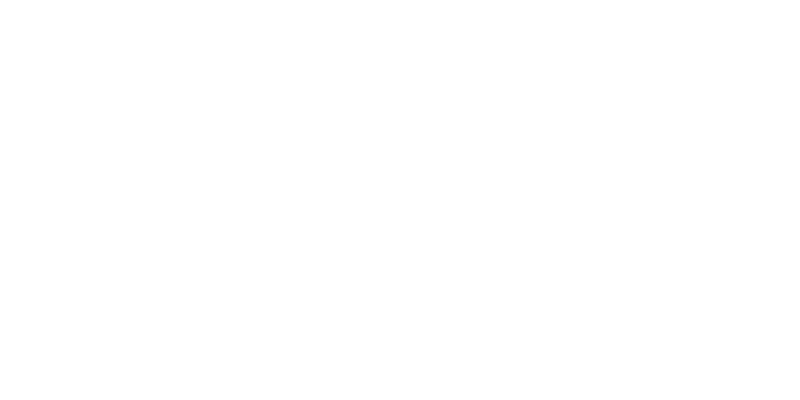

In [19]:
Grafica('Saldo en cuenta corriente (balanza de pagos, US$ a precios actuales)')

In [20]:
Buscador('capital')

['AOD neta recibida (% de formación bruta de capital)',
 'Ahorro ajustado: consumo de capital fijo (% del INB)',
 'Ahorro ajustado: consumo de capital fijo (US$ actuales)',
 'Cuenta de capital neto (balanza de pagos, US$ a precios actuales)',
 'Empresas que usan bancos para financiar el capital de trabajo (% de empresas)',
 'Formación bruta de capital (% del PIB)',
 'Formación bruta de capital (% del crecimiento anual)',
 'Formación bruta de capital (UMN a precios actuales)',
 'Formación bruta de capital (UMN a precios constantes)',
 'Formación bruta de capital (US$ a precios actuales)',
 'Formación bruta de capital (US$ a precios constantes de 2010)',
 'Formación bruta de capital fijo (% del PIB)',
 'Formación bruta de capital fijo (% del crecimiento anual)',
 'Formación bruta de capital fijo (UMN a precios actuales)',
 'Formación bruta de capital fijo (UMN a precios constantes)',
 'Formación bruta de capital fijo (US$ a precios actuales)',
 'Formación bruta de capital fijo (US$ a pre

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


------------------------------------------------
Información del Dataset HKG
<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 1960.0 to 2019.0
Data columns (total 1 columns):
Cuenta de capital neto (balanza de pagos, US$ a precios actuales)    22 non-null object
dtypes: object(1)
memory usage: 3.4+ KB
None
Información del Dataset JPN
<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 1960.0 to 2019.0
Data columns (total 1 columns):
Cuenta de capital neto (balanza de pagos, US$ a precios actuales)    24 non-null object
dtypes: object(1)
memory usage: 3.4+ KB
None
------------------------------------------------
Porcentaje de datos no nulos (Hong Kong) (%):
Indicator Name
Cuenta de capital neto (balanza de pagos, US$ a precios actuales)    36.666667
dtype: float64
Porcentaje de datos no nulos (Japón) (%):
Indicator Name
Cuenta de capital neto (balanza de pagos, US$ a precios actuales)    40.0
dtype: float64
------------------------------------------------
------------------

<IPython.core.display.Javascript object>


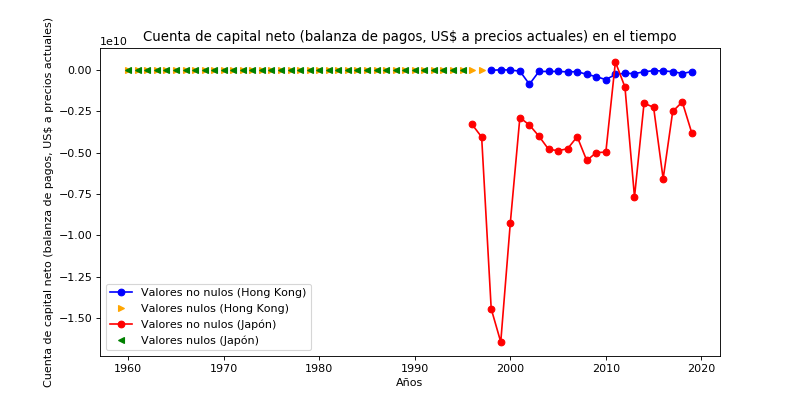

In [21]:
Grafica('Cuenta de capital neto (balanza de pagos, US$ a precios actuales)')

In [24]:
Buscador('PIB')

['Acciones negociadas, valor total (% del PIB)',
 'Adquisición neta de activos financieros (% del PIB)',
 'Agricultura, valor agregado (% del PIB)',
 'Ahorro bruto (% del PIB)',
 'Ahorro interno bruto (% del PIB)',
 'Balanza comercial de bienes y servicios (% del PIB)',
 'Capacidad de financiamiento neto (+)/necesidad de financiamiento neto (-) (% del PIB)',
 'Capitalización en el mercado de empresas nacionales que cotizan en bolsa (% del PIB)',
 'Comercio (% del PIB)',
 'Comercio de mercaderías (% del PIB)',
 'Comercio de servicios (% del PIB)',
 'Contracción neta de pasivos, total (% del PIB)',
 'Crecimiento del PIB (% anual)',
 'Crecimiento del PIB per cápita (% anual)',
 'Crédito interno al sector privado (% del PIB)',
 'Crédito interno al sector privado otorgado por los bancos (% del PIB)',
 'Crédito interno proporcionado por el sector financiero (% del PIB)',
 'Créditos a otros sectores de la economía nacional (% del PIB)',
 'Créditos al gobierno central, etc. (% del PIB)',
 'Def

------------------------------------------------
Información del Dataset HKG
<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 1960.0 to 2019.0
Data columns (total 1 columns):
Crecimiento del PIB (% anual)    58 non-null object
dtypes: object(1)
memory usage: 3.4+ KB
None
Información del Dataset JPN
<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 1960.0 to 2019.0
Data columns (total 1 columns):
Crecimiento del PIB (% anual)    59 non-null object
dtypes: object(1)
memory usage: 3.4+ KB
None
------------------------------------------------
Porcentaje de datos no nulos (Hong Kong) (%):
Indicator Name
Crecimiento del PIB (% anual)    96.666667
dtype: float64
Porcentaje de datos no nulos (Japón) (%):
Indicator Name
Crecimiento del PIB (% anual)    98.333333
dtype: float64
------------------------------------------------
------------------------------------------------
Gráfica del Indicador con valores nulos


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<IPython.core.display.Javascript object>


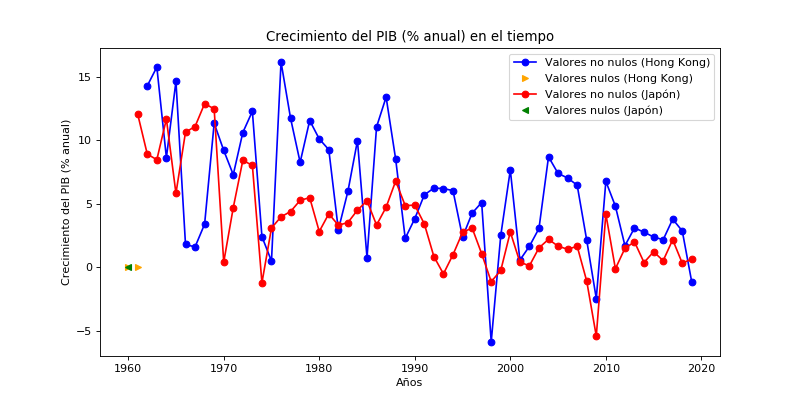

In [27]:
Grafica('Crecimiento del PIB (% anual)')

In [31]:
Buscador('PIB')

['Acciones negociadas, valor total (% del PIB)',
 'Adquisición neta de activos financieros (% del PIB)',
 'Agricultura, valor agregado (% del PIB)',
 'Ahorro bruto (% del PIB)',
 'Ahorro interno bruto (% del PIB)',
 'Balanza comercial de bienes y servicios (% del PIB)',
 'Capacidad de financiamiento neto (+)/necesidad de financiamiento neto (-) (% del PIB)',
 'Capitalización en el mercado de empresas nacionales que cotizan en bolsa (% del PIB)',
 'Comercio (% del PIB)',
 'Comercio de mercaderías (% del PIB)',
 'Comercio de servicios (% del PIB)',
 'Contracción neta de pasivos, total (% del PIB)',
 'Crecimiento del PIB (% anual)',
 'Crecimiento del PIB per cápita (% anual)',
 'Crédito interno al sector privado (% del PIB)',
 'Crédito interno al sector privado otorgado por los bancos (% del PIB)',
 'Crédito interno proporcionado por el sector financiero (% del PIB)',
 'Créditos a otros sectores de la economía nacional (% del PIB)',
 'Créditos al gobierno central, etc. (% del PIB)',
 'Def

------------------------------------------------
Información del Dataset HKG
<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 1960.0 to 2019.0
Data columns (total 1 columns):
Importaciones de bienes y servicios (% del PIB)    60 non-null object
dtypes: object(1)
memory usage: 3.4+ KB
None
Información del Dataset JPN
<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 1960.0 to 2019.0
Data columns (total 1 columns):
Importaciones de bienes y servicios (% del PIB)    49 non-null object
dtypes: object(1)
memory usage: 3.4+ KB
None
------------------------------------------------
Porcentaje de datos no nulos (Hong Kong) (%):
Indicator Name
Importaciones de bienes y servicios (% del PIB)    100.0
dtype: float64
Porcentaje de datos no nulos (Japón) (%):
Indicator Name
Importaciones de bienes y servicios (% del PIB)    81.666667
dtype: float64
------------------------------------------------
------------------------------------------------
Gráfica del Indicador con valores nulos


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<IPython.core.display.Javascript object>


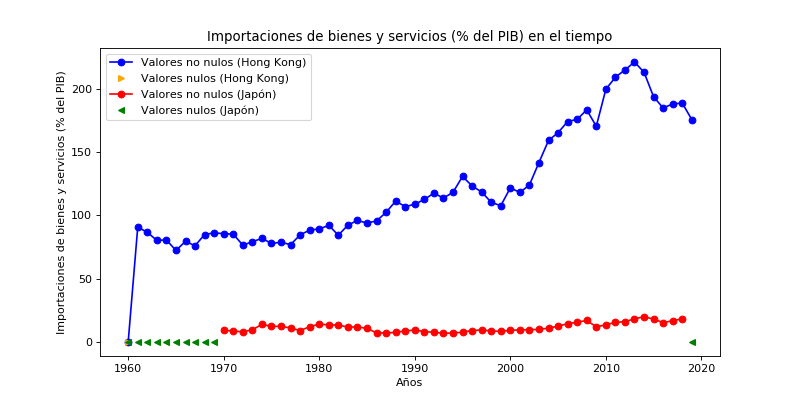

In [32]:
Grafica('Importaciones de bienes y servicios (% del PIB)')

------------------------------------------------
Información del Dataset HKG
<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 1960.0 to 2019.0
Data columns (total 1 columns):
Remesas de trabajadores y compensación de empleados, recibidas (% del PIB)    22 non-null object
dtypes: object(1)
memory usage: 3.4+ KB
None
Información del Dataset JPN
<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 1960.0 to 2019.0
Data columns (total 1 columns):
Remesas de trabajadores y compensación de empleados, recibidas (% del PIB)    37 non-null object
dtypes: object(1)
memory usage: 3.4+ KB
None
------------------------------------------------
Porcentaje de datos no nulos (Hong Kong) (%):
Indicator Name
Remesas de trabajadores y compensación de empleados, recibidas (% del PIB)    36.666667
dtype: float64
Porcentaje de datos no nulos (Japón) (%):
Indicator Name
Remesas de trabajadores y compensación de empleados, recibidas (% del PIB)    61.666667
dtype: float64
--------------------------

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<IPython.core.display.Javascript object>


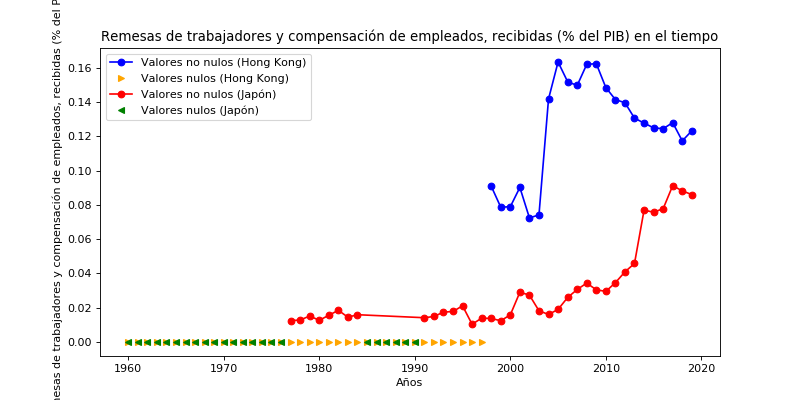

In [34]:
Grafica('Remesas de trabajadores y compensación de empleados, recibidas (% del PIB)')